In [1]:
from time import time   
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sortFunc import mergeSort,bubbleSort,selectionSort,insertionSort,quickSort,radixSort

import sys
sys.setrecursionlimit(5000)

In [2]:
#wrapper to count function execution time
from functools import wraps
import time

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args):
        start_time = time.perf_counter()
        result = func(*args)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        return total_time
    return timeit_wrapper

In [3]:
#initialize the sorting functions, data array and the array sizes
sortFuncs = [mergeSort, bubbleSort, selectionSort, insertionSort, quickSort]
funcExecTimeData = {"mergeSort":[], "bubbleSort":[], "selectionSort":[], "insertionSort":[], "quickSort":[], "radixSort":[]}
array_sizes = [10, 100, 500, 1000, 2000, 2500,3000,4000]

In [4]:
#loop, execute and store time result
for size in array_sizes:
    random_array = np.random.randint(1,999,(1,size))[0]
    funcExecTimeData["mergeSort"].append(timeit(mergeSort)(random_array,0,size-1))
    funcExecTimeData["bubbleSort"].append(timeit(bubbleSort)(random_array))
    funcExecTimeData["selectionSort"].append(timeit(selectionSort)(random_array))
    funcExecTimeData["insertionSort"].append(timeit(insertionSort)(random_array))
    funcExecTimeData["quickSort"].append(timeit(quickSort)(random_array,0, size-1))
    funcExecTimeData["radixSort"].append(timeit(radixSort)(random_array))


In [5]:
funcExtimedf = pd.DataFrame(funcExecTimeData, index=array_sizes)
funcExtimedf

,mergeSort,bubbleSort,selectionSort,insertionSort,quickSort,radixSort
10,0.000036,0.000015,0.000017,0.000005,0.000039,0.000053
100,0.000374,0.001144,0.001089,0.000036,0.002725,0.000316
500,0.003092,0.026812,0.022852,0.000165,0.050083,0.001264
1000,0.004192,0.091889,0.090998,0.000311,0.200198,0.002529
2000,0.009048,0.375916,0.376247,0.001121,0.824551,0.005223
2500,0.012058,0.648040,0.576420,0.000813,1.299454,0.007475
3000,0.015744,0.869886,0.883419,0.000950,3.459618,0.020376
4000,0.063781,3.871588,2.915033,0.001273,3.416635,0.010411


(0.0, 1.0)

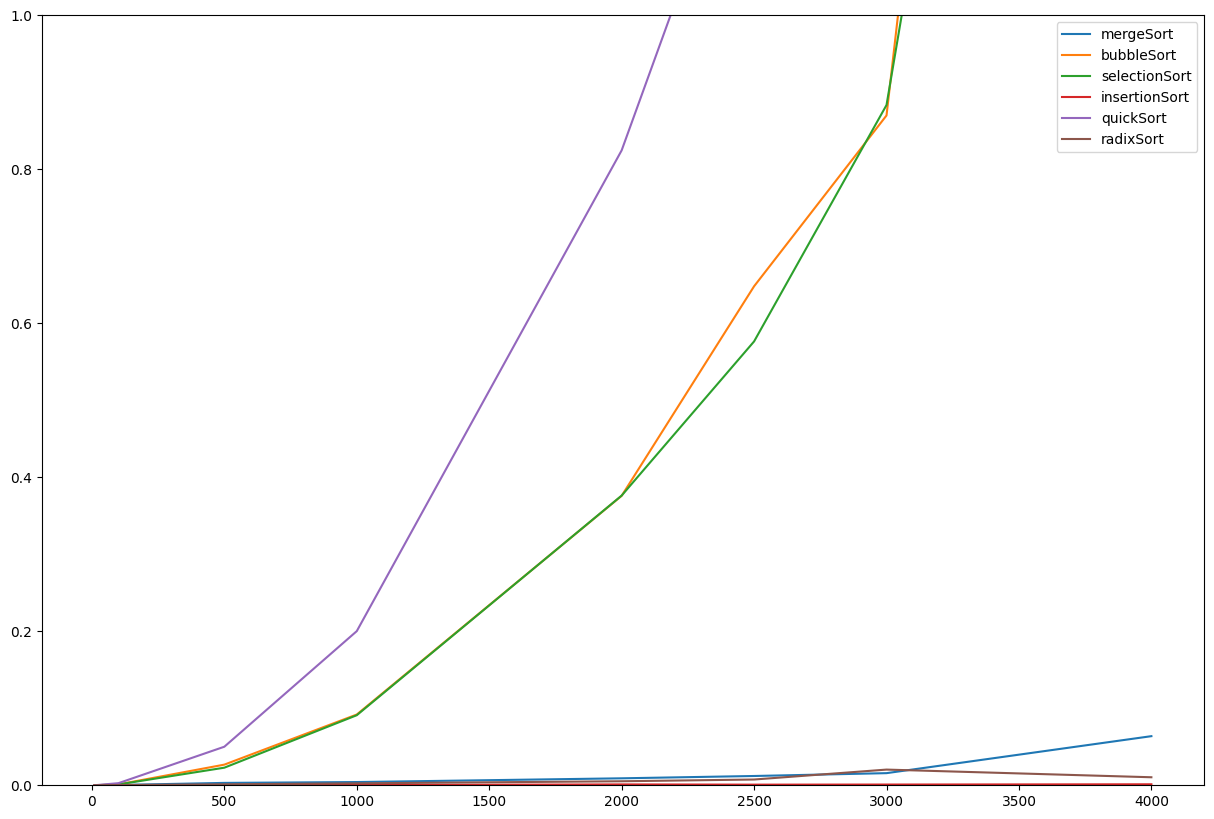

In [6]:
plt.figure(figsize=(15,10))
frame = sns.lineplot(data=funcExtimedf, dashes=False,)
frame.set_ylim(0,1)